# Assignment 3 - Supervised Learning

## *Hannah Yan*
Netid:  *hy151*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a)  
The likelihood function is below:

$\begin{align*}\prod_{i=1}^{N}\sigma(\mathbf{w}^T
\mathbf{x}_i)^ {\mathbf{y}_i} [1-\sigma(\mathbf{w}^T \mathbf{x}_i)]^ {1-\mathbf{y}_i}\end{align*}$

(b)

$\begin{align*}C(w) 
&= - \frac{1}{N}ln(\prod_{i=1}^{N}\sigma(\mathbf{w}^T \mathbf{x}_i)^ {\mathbf{y}_i} [1-\sigma(\mathbf{w}^T \mathbf{x}_i)^ {1-\mathbf{y}_i)}]) \\
&= -\frac{1}{N}\sum_{i=1}^{N}({\mathbf{y}_i}ln( \sigma(\mathbf{w}^T \mathbf{x}_i) + ({1-\mathbf{y}_i)ln(1-\sigma(\mathbf{w}^T \mathbf{x}_i)}))
\end{align*}$

(c)  

$\begin{align*}ln( \sigma(\mathbf{w}^T \mathbf{x}_i) \\
&= ln(\frac{1}{1 + e^{-w^Tx_i}})  \\
&= -ln({1 + e^{-w^Tx_i}})\end{align*}$

$\begin{align*}ln(1-\sigma(\mathbf{w}^T \mathbf{x}_i)) \\
&=ln(\frac{e^{-w^Tx}}{1+e^{-w^Tx}}) \\
&=-w^Tx-ln(1+e^{-w^Tx})
\end{align*}$

$\begin{align*}
C(w) \\
&= -\frac{1}{N}\sum_{i=1}^{N} (-y_iln({1 + e^{-w^Tx_i}}) - (1-y)(w^Tx+ln(1+e^{-w^Tx})) \\
&= -\frac{1}{N}\sum_{i=1}^{N} (y_iw^Tx_i - ln(1+e^{w^Tx_i})) 
\end{align*}$

$\begin{align*}
\frac{\partial C}{\partial w_0} &=  \sum_{i=1}^{N} \sigma (w^Tx_ix_{ij}-y_i) \\
\frac{\partial C}{\partial w_1} &=  \sum_{i=1}^{N} \sigma (w^Tx_ix_{ij}-y_i) \cdot x_{xi1} \\
\frac{\partial C}{\partial w_2} &=  \sum_{i=1}^{N} \sigma (w^Tx_ix_{ij}-y_i) \cdot x_{xi2}
\end{align*}$

(d)  
$w^{i+1} = w^{i} - \eta \nabla_ f(w^i)$

(e)   
It appears separable. Logistic regression would be a good choice as it classifies based on a threshold cutoff.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("white")
%matplotlib inline

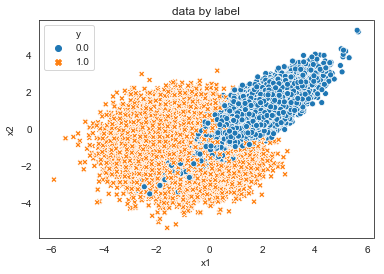

In [74]:
df=pd.read_csv('data/A3_Q1_data.csv')
sns.scatterplot(x="x1", y="x2", hue="y", style="y", data=df).set_title('data by label')

(f)  
The dataset does not have missing value and do not require scaling.

In [75]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [76]:
df.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


In [77]:
X=pd.DataFrame(np.c_[np.ones(100000),df[['x1','x2']]])
y=df['y'].values.reshape((-1,1))

(g)

In [78]:
def sigmoid(p):
    '''calc sigmoid'''
    return np.exp(p)/(1+np.exp(p))

def proba(w, X):
    '''calc probability'''
    return sigmoid(np.dot(X, w))

In [114]:
def cost_fun(w, X, y):
    '''cost function for logistic regression, w is a 3x1 vector, x is a n*3 vector, output class probability'''
    a = proba(w,X) #n*1 array
    n = a.shape[0]
    #cost = -np.mean(y* np.log(proba(w,X)) + (1-y) * np.log(1 - proba(w,X)))
    cost = -(1/X.shape[0])*np.sum((y* np.log(proba(w,X)) + (1-y) * np.log(1 - proba(w,X))))
    return cost

(h)

In [80]:
def predict(w, X, thres = 0.5):
    '''calc class label'''
    predicted_class = (proba(X) >= thres).astype(int)
    return predicted_class

(i)

In [81]:
#create train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
# inititate the weight
w=np.array([0.1, 0.2, 0.3]).reshape(3,1)
print(w)
#check initial cost
print(cost_fun(w, X, y))

[[ 0.1]
 [ 0.2]
 [ 0.3]]
0.928614217918


In [83]:
def cost_gradient(w, X, y):
    ''' gradient of the cost function'''
    yhat = proba(w, X)
    gradient = (1/len(X)) * X.T.dot(yhat-y)
    return gradient

In [84]:
def grad_desc(w, X, y, lr=.1, converge_change=.0000001): 
    ''' 
    gradient descent function for finding local minima
    return updated weight and cost
    '''
    weights = []
    epoch = 1
    #l2 norm of weights 

    change_w=np.inf
    while(change_w > converge_change): 
        prior_w = w
        #update weight
        w = w - (lr *  cost_gradient(w, X, y)) 
        #add all weight vectors to a list
        weights.append(w)
        #calc weight dif
        change_w = np.linalg.norm(w-prior_w)
        #increment counter
        epoch += 1
      
    return weights, epoch

(j)

In [85]:
(w1, epoch)=grad_desc(w, X_train, y_train, lr=.1, converge_change=.0000001)

In [86]:
c1=[]
c2=[]
for i in range(len(w1)):
    c1.append(cost_fun(w1[i], X_train, y_train))
    c2.append(cost_fun(w1[i], X_test, y_test))

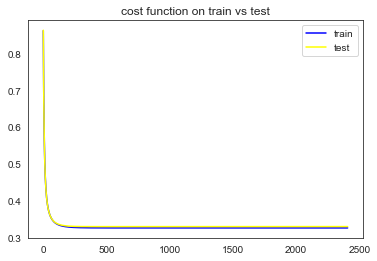

In [120]:
plt.plot(np.arange(len(c1)), c1, c='blue',label='train')
plt.plot(np.arange(len(c2)), c2, c='yellow',label='test')
plt.title('cost function on train vs test')
plt.legend(loc='best')
plt.show()

(k)

In [88]:
#vary learning rate
(w02, epoch)=grad_desc(w, X_train, y_train, lr=.02, converge_change=.0000001)
(w05, epoch)=grad_desc(w, X_train, y_train, lr=.05, converge_change=.0000001)

In [138]:
c02=[]
c02_test=[]
c05=[]
c05_test=[]
for i in range(len(w02)):
    c02.append(cost_fun(w02[i], X_train, y_train))
    c02_test.append(cost_fun(w02[i], X_test, y_test))
for i in range(len(w05)):
    c05.append(cost_fun(w05[i], X_train, y_train))
    c05_test.append(cost_fun(w05[i], X_test, y_test))

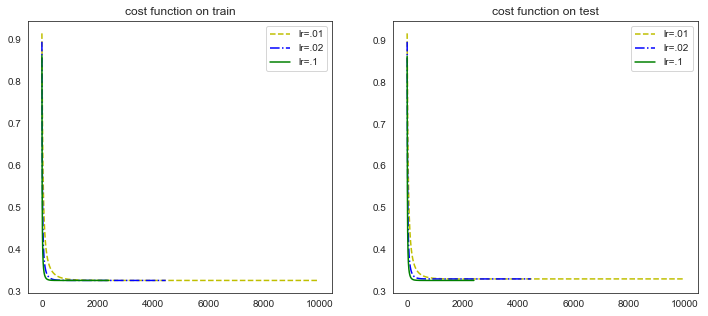

In [140]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(c02)), c02, 'y--',label='lr=.01')
plt.plot(np.arange(len(c05)), c05, 'b-.',label='lr=.02')
plt.plot(np.arange(len(c1)), c1, 'g-',label='lr=.1')
plt.title('cost function on train')
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(c02_test)), c02_test, 'y--',label='lr=.01')
plt.plot(np.arange(len(c05_test)), c05_test, 'b-.',label='lr=.02')
plt.plot(np.arange(len(c1)), c1, 'g-',label='lr=.1')
plt.title('cost function on test')
plt.legend(loc='best')
plt.show()

Given that the classifier converges with all these learning rates, I'll choose a faster one, thus learning rate at 0.1. We also need to avoid large learning rate since it has the risk of overshooting the minima.

(l)

In [91]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
cv = StratifiedKFold(n_splits=5)

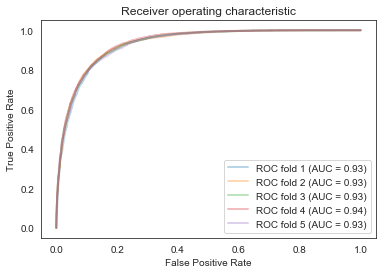

In [92]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_train,y_train):
    (w_train, _)=grad_desc(w, X_train.iloc[train], y_train[train], lr=.1, converge_change=.01)
    y_pred_proba=proba(w_train[-1], X_train.iloc[test])
    fpr, tpr, _ = roc_curve(y_train[test], y_pred_proba)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

(m)  
We use cross-validation as a resampling procedure to evaluate machine learning models on a limited data sample. It generally results in a less biased or less optimistic estimate of the model.

(n)

In [144]:
def plot_decisionboundary(X, y, title):
    X_mat = np.array(X)
    y_mat = np.array(y)

    # Create color maps
    cm = ListedColormap(['#fffff0', '#30a2da']) #make one class white for color contrast
    cm_bright = ListedColormap(['#fffff0',  '#a7c4d3'])


    # step size in the mesh
    mesh_step_size = .01  
    plot_symbol_size = 50

    # Plot the decision boundary 
    x_min, x_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    y_min, y_max = X_mat[:, 2].min() - 1, X_mat[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))


    Z = sigmoid(np.dot(np.c_[np.ones(xx.ravel().shape[0]),xx.ravel(), yy.ravel()], w_trained))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot training points
    plt.scatter(X_mat[:, 1], X_mat[:, 2], s=plot_symbol_size, c=y_mat, cmap=cm, edgecolor = 'black')
    plt.title('decision boundary for %s' %title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    
#use trained weights
w_trained=w1[-1]

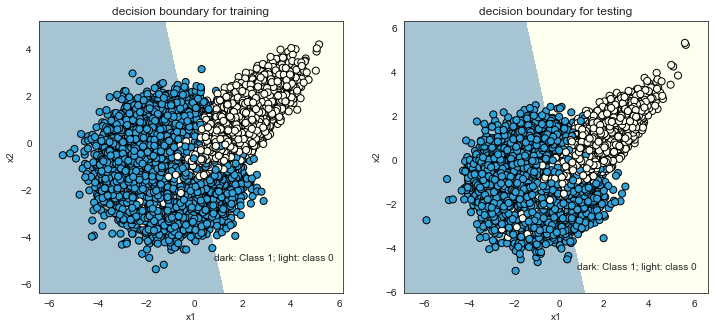

In [152]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.annotate('dark: Class 1; light: class 0', 
             xy=(0.8,-5),  
             xycoords='data')
plot_decisionboundary(X_train, y_train, 'training')
plt.subplot(1, 2, 2)
plt.annotate('dark: Class 1; light: class 0', 
             xy=(0.8,-5),  
             xycoords='data')
plot_decisionboundary(X_test, y_test, 'testing')

As the two classes overlap, a linear decision boundary inevitably result in some misclassification. Potentially after some projection or transformation, the two classes can be better separated.

(o)

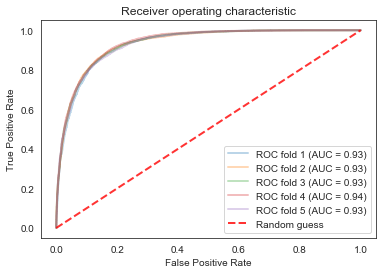

In [23]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X_train,y_train):
    (w_train, _)=grad_desc(w, X_train.iloc[train], y_train[train], lr=.1, converge_change=.01)
    y_pred_proba=proba(w_train[-1], X_train.iloc[test])
    fpr, tpr, _ = roc_curve(y_train[test], y_pred_proba)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random guess', alpha=.8)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

(a)

In [24]:
from mlxtend.data import loadlocal_mnist
X_train, y_train_all = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')

In [25]:
X_test, y_test_all = loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte')

In [26]:
#transform label into binary
y_train=(y_train_all==3).astype(int)
y_test=(y_test_all==3).astype(int)
np.mean(y_train)

0.10218333333333333

(b)

In [27]:
pos = X_train[np.where(y_train==1)][:10]
neg = X_train[np.where(y_train!=1)][:10]

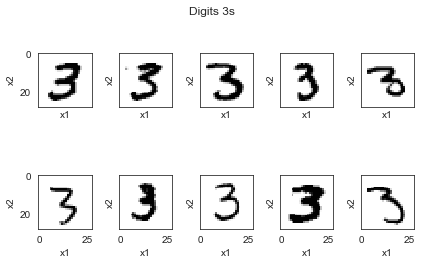

In [57]:
plt.figure(figsize=(12,4))
fig, axes = plt.subplots(2,5, 
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box-forced', aspect='equal')) #https://stackoverflow.com/q/44703433/1870832

for i, (image, label) in enumerate(zip(pos, np.ones(10))):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i%2 
    subplot_col = i%5
    ax = axes[subplot_row, subplot_col]
    # plot image on subplot
    ax.imshow(np.reshape(image, (28,28)), cmap='gray_r')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

plt.tight_layout()


fig.suptitle("Digits 3s")
plt.show()

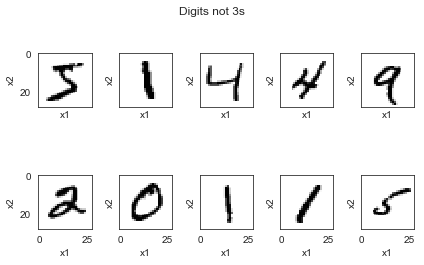

In [58]:
plt.figure(figsize=(12,4))
fig, axes = plt.subplots(2,5, 
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box-forced', aspect='equal')) #https://stackoverflow.com/q/44703433/1870832

for i, (image, label) in enumerate(zip(neg, np.ones(10))):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i%2 
    subplot_col = i%5
    ax = axes[subplot_row, subplot_col]
    # plot image on subplot
    ax.imshow(np.reshape(image, (28,28)), cmap='gray_r')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
plt.tight_layout()
fig.suptitle('Digits not 3s')
plt.show()



(c)

In [30]:
print('There are %d number of Class 1 and %d number of Class 0' %(list(y_train).count(1),list(y_train).count(0)))

There are 6131 number of Class 1 and 53869 number of Class 0


The classes are imbalanced and the classifier will tend to gravitate towards the majority class.

(d) 

In [31]:
import time
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve,f1_score, roc_auc_score, auc
from scipy import interp
from sklearn.dummy import DummyClassifier

In [32]:
#(1) a random guess classifier
model_random = DummyClassifier(strategy = 'uniform', constant=0)
model_random.fit(X_train, y_train)
y_pred_random = model_random.predict(X_test)
fpr_random, tpr_random, _ = roc_curve(y_test, y_pred_random)
pre_random, rec_random, _ = precision_recall_curve(y_test, y_pred_random)

#(2) a classifier that guess all examples are not 3's
model_all_neg = DummyClassifier(strategy = 'constant', constant=0)
model_all_neg.fit(X_train, y_train)
y_pred_all_neg = model_all_neg.predict(X_test)
fpr_all_neg, tpr_all_neg, _ = roc_curve(y_test, y_pred_all_neg)
pre_all_neg, rec_all_neg, _ = precision_recall_curve(y_test, y_pred_all_neg)

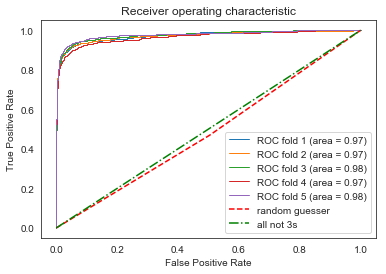

In [33]:
cv = StratifiedKFold(n_splits=5)
classifier = LogisticRegression(solver = 'lbfgs')

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

i=1
for train, test in cv.split(X_train, y_train):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    #mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i+=1

#mean_tpr =np.mean(tpr)
#mean_auc = auc(mean_fpr, mean_tpr)
#plt.plot(mean_fpr, mean_tpr, 'k--',
 #        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

#add 2 random baseline classifier for comparison
plt.plot(fpr_random, tpr_random, 'r--',label='random guesser')
plt.plot(fpr_all_neg, tpr_all_neg, 'g-.',label='all not 3s')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The algorithm has average 0.97 ROC which is significantly better than random guess or guessing all digits are not 3s

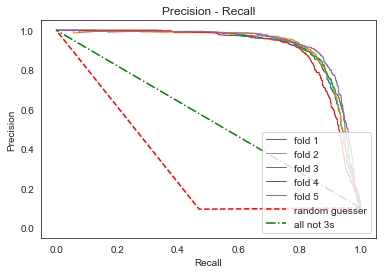

In [34]:
cv = StratifiedKFold(n_splits=5)
classifier = LogisticRegression(solver = 'lbfgs')

mean_pre = 0.0
mean_rec = np.linspace(0, 1, 100)
all_pre = []

i=1
for train, test in cv.split(X_train, y_train):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    pre, rec, thresholds = precision_recall_curve(y_train[test], probas_[:, 1])

    plt.plot(rec, pre, lw=1, label='fold %d' % (i))
    i+=1

#add 2 random baseline classifier for comparison
plt.plot(rec_random, pre_random, 'r--',label='random guesser')
plt.plot(rec_all_neg, pre_all_neg, 'g-.',label='all not 3s')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall')
plt.legend(loc="lower right")
plt.show()

(f)

In [35]:
nonzero_coef=[]
f1=[]
auc=[]
coef_list = [0.001, 0.01, 0.1, 0.5, 1, 2, 5]

for c in coef_list:
    clf=LogisticRegression(solver = 'liblinear', penalty='l1',C=c).fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    #coef
    coefs = clf.coef_
    nonzero_coef.append(np.count_nonzero(coefs))
    #auc
    auc.append(roc_auc_score(y_test, y_pred))
    #f1
    f1.append(f1_score(y_test, y_pred))

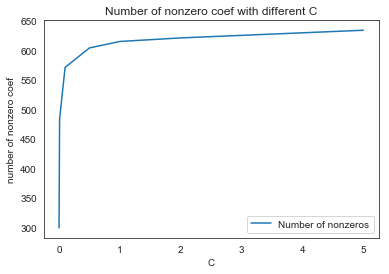

In [61]:
plt.plot(coef_list, nonzero_coef, label='Number of nonzeros')
plt.title('Number of nonzero coef with different C')
plt.xlabel('C')
plt.ylabel('number of nonzero coef')
plt.legend(loc='best')
plt.show()

As C increases (regularization strength decreases), number of nonzero coef decreases. This is because more regularization forced more coefficients to 0

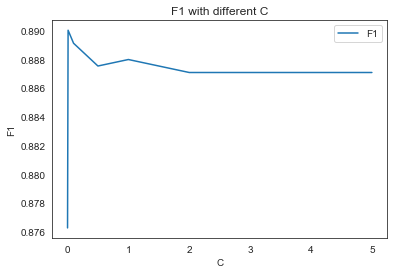

In [60]:
plt.plot(coef_list, f1, label='F1')
plt.title('F1 with different C')
plt.xlabel('C')
plt.ylabel('F1')
plt.legend(loc='best')
plt.show()

F1 score first increases with C then decreases.

(4) 

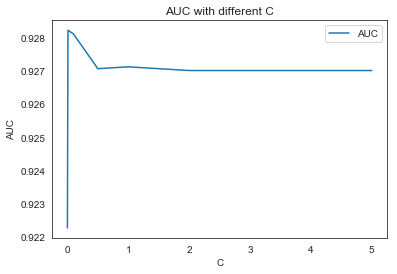

In [59]:
plt.plot(coef_list, auc, label='AUC')
plt.title('AUC with different C')
plt.xlabel('C')
plt.ylabel('AUC')
plt.legend(loc='best')
plt.show()

AUC first increases with C, then decreases as the model starts to overfit the data.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to descrive this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

(a)  
The problem I want to work on is to predict the cuisine types based on food ingredients because food is an interesting topic for me and also an important aspect of culture.

The dataset contains 49718 recipes from 20 cuisine types from Italian to Indian, listing all the ingredient used. I want to build a multi-class classifier using text data.

(b)

In [39]:
import json
import pandas as pd
%matplotlib inline
from pandas.io.json import json_normalize

def load_json(input_path):
    json_list = json.load(open(input_path))
    return pd.DataFrame.from_dict(json_normalize(json_list), orient='columns')

In [40]:
from sklearn.model_selection import train_test_split
df = load_json('whats_cooking/train.json')
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


The data contains 3 columns: cuisine, recipe id (we can ignore that since it's not useful) and lists of ingredients.

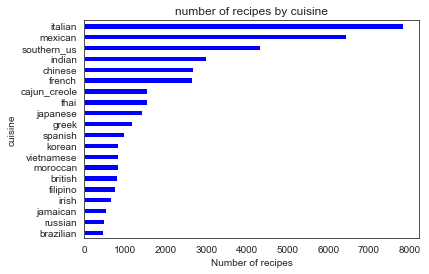

In [41]:
df.groupby('cuisine')['id'].nunique().sort_values(). \
plot(kind='barh',color='blue').set_title('number of recipes by cuisine')
plt.xlabel('Number of recipes')

There are more sample in certain cuisine types such as Italian (nearly 8000) and fewer in certain others such as Brazilian (less than 500).

(c)

The target variable to predict is the cuisine type. 

While there is no missing data, I'll do some cleaning on the text to avoid an unnessarily sparse matrix. Later on I'll remove some unnecessary words in the parenthesis such as (1% reduced milk) or (2% reduced milk). 

(d)   
I will use one-vs-rest logistic regression because it's widely used, relatively easy to explain and later on returned decent result.

(e)  
I will use macro-F1 score (the average precision and recall for each class label).
Because it's a multi-class with unbalanced sample size, I do not want to bias towards the majority class such as Italian, so I use macro-F1.

(f)  
I'll use 5-fold cross-validation which can be better at reducing variance than simple train/test split.

In [42]:
#text
from sklearn.feature_extraction.text import TfidfVectorizer
#classifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#performance
from sklearn.model_selection import cross_validate

In [43]:
X_df = df['ingredients']
y_df = df['cuisine']

I preprocessed the text using tfidf to identify the uniqueness of ingredients among each cuisine.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import re

#split to pre-process text 
vect = TfidfVectorizer(tokenizer=lambda x: [re.sub(r'\(.*?\)','',i).strip() for i in x.split(',')], 
                       lowercase=False, stop_words='english')

#then join to fit transform strings
dummies = vect.fit_transform(X_df.apply(','.join)) 

df_transformed = pd.DataFrame(dummies.todense(),columns=vect.get_feature_names())
print("Vocab Length: ", len(vect.get_feature_names()))
print("All Data Shape: ", df_transformed.shape)
print("Number of Predictors: ", df_transformed.shape[0])
df_transformed.head()

Vocab Length:  6713
All Data Shape:  (39774, 6713)
Number of Predictors:  39774


,,1 inch thick,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,1% low-fat milk,2 1/2 to 3 lb. chicken,2% low fat cheddar chees,2% low-fat cottage cheese,2% lowfat greek yogurt,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
print(df_transformed.shape, y_df.shape)

(39774, 6713) (39774,)


In [46]:
model = LogisticRegression(multi_class= 'ovr')
score = cross_validate(model, df_transformed, y_df, cv=5, return_train_score=False)
score

{'fit_time': array([ 11.82908106,  10.22344494,   8.36979103,   7.28031087,   6.36447096]),
 'score_time': array([ 0.97562599,  0.94243193,  0.978163  ,  0.204319  ,  0.22437   ]),
 'test_score': array([ 0.76312484,  0.7729329 ,  0.76382604,  0.76443215,  0.76758525])}

In [47]:
score['test_score'].mean()

0.76638023663025934

(g)

In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
labels=y_df.unique()
labels
y_pred = cross_val_predict(model, df_transformed, y_df, cv=5)
conf_mat = confusion_matrix(y_df, y_pred, labels)
cm_df = pd.DataFrame(conf_mat,
                     index = labels, 
                     columns = labels)

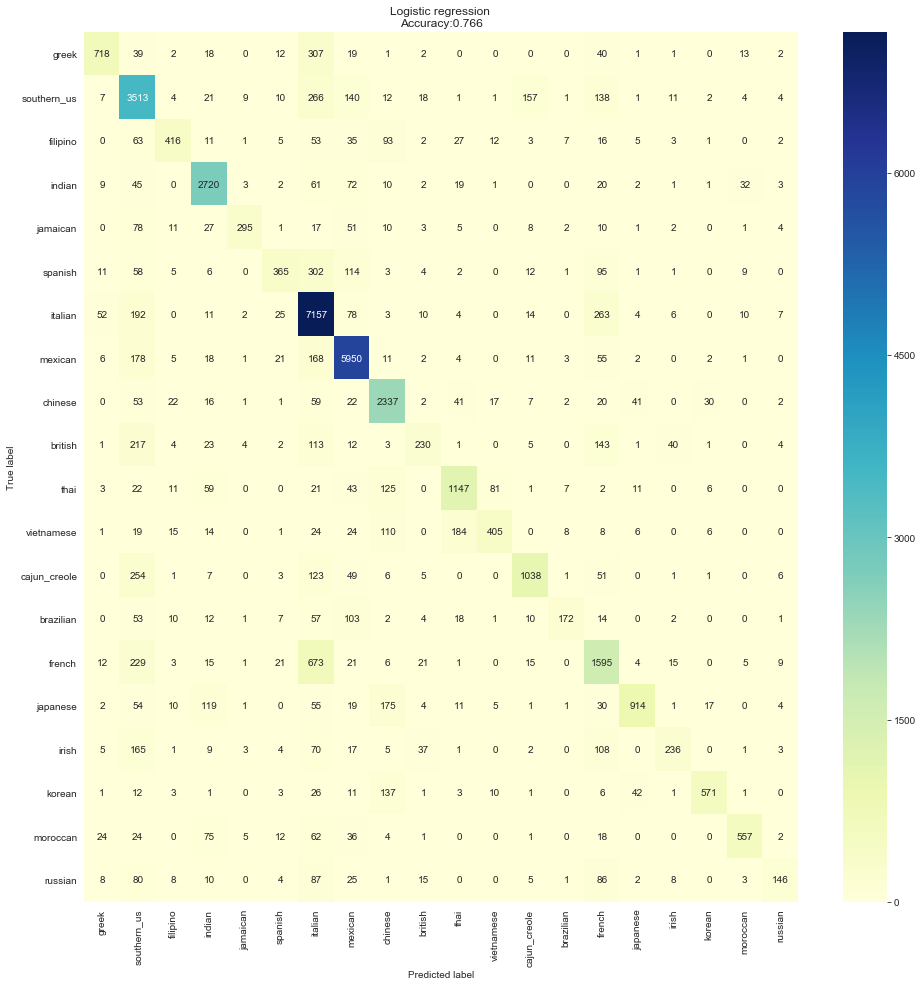

In [49]:
#plot multi-class confusion matrix
plt.figure(figsize=(16,16))
ax=sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels, fmt='d')
plt.title('Logistic regression \nAccuracy:{0:.3f}'.format(score['test_score'].mean()))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Based on the confusion matrix, we can tell majority of the predictions end on the diagnoal which means correct classification. However, we also notice certain misclassification such as French or Spanish cuision misclassified as Italian or Cajun Creole misclassified as Southern US. There are indeed some similarity between these cusine types, possibly due to geographical proximity and diaspora. 

Next we look into some example of the misclassified cases, including the misclassified categories we identified from the confusion matrix.

In [50]:
#index for misclassified items
idx=np.where(y_df!=y_pred)
misclassification=pd.concat([pd.DataFrame(y_pred).iloc[idx],pd.DataFrame(y_df).iloc[idx],X_df.iloc[idx]], axis=1)
misclassification.columns=['predicted','actual','ingredients']
misclassification.head(10)

,predicted,actual,ingredients
5,southern_us,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,mexican,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
14,french,italian,"[fresh parmesan cheese, butter, all-purpose fl..."
16,italian,british,"[greek yogurt, lemon curd, confectioners sugar..."
18,vietnamese,thai,"[sugar, hot chili, asian fish sauce, lime juice]"
19,chinese,vietnamese,"[soy sauce, vegetable oil, red bell pepper, ch..."
22,italian,southern_us,"[low-fat mayonnaise, pepper, salt, baking pota..."
23,thai,chinese,"[sesame seeds, red pepper, yellow peppers, wat..."
26,indian,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, ..."
30,southern_us,italian,"[yellow corn meal, boiling water, butter, fres..."


In [51]:
#japanese misclassified as chinese food
jp_cn = (misclassification['predicted'] =='chinese') & (misclassification['actual'] =='japanese')
misclassification[jp_cn].head(3)

,predicted,actual,ingredients
78,chinese,japanese,"[top round steak, vegetable oil, shiitake, soy..."
154,chinese,japanese,"[ground pepper, flour, garlic, onions, fresh g..."
205,chinese,japanese,"[hoisin sauce, corn starch, green onions, extr..."


In [52]:
#Southern US misclassified as Chinese food
cn_us = (misclassification['predicted'] =='chinese') & (misclassification['actual'] =='southern_us')
misclassification[cn_us].head(3)

,predicted,actual,ingredients
1770,chinese,southern_us,"[soy sauce, red pepper flakes, lime, white sug..."
3774,chinese,southern_us,"[garlic powder, pork spareribs, sesame seeds, ..."
10097,chinese,southern_us,"[white bread, egg whites, white sugar, soy sau..."


Based on the observations of misclassified samples, we have the following insights:

1. pastries can be easily misclassified. It's generally hard to tell the cuisine types of a pastry by just looking at the ingredients without the cooking steps, because they largely share ingredients like flour, sugar, butter, etc. 
2. some ingredient list in the dataset are too short to contain distinctive information, such as the vietnamese dish misclassified as thai, from the ingredients list of fish sauce and hot chili it's actually impossible to even manually classify because these are commonly shared ingredients.
3. shared distinctive ingredients between cuisines still pose a challenge. For example, corn meal is a common ingredients in both Southern US cooking and North Italian, and soy sauce is used in both Chinese and Japanese cuisines.

(h)  

Classification report for each class

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_df, y_pred, target_names=labels))

              precision    recall  f1-score   support

       greek       0.83      0.37      0.51       467
 southern_us       0.63      0.29      0.39       804
    filipino       0.80      0.67      0.73      1546
      indian       0.77      0.87      0.82      2673
    jamaican       0.78      0.55      0.65       755
     spanish       0.59      0.60      0.59      2646
     italian       0.83      0.61      0.71      1175
     mexican       0.85      0.91      0.88      3003
     chinese       0.72      0.35      0.47       667
     british       0.74      0.91      0.82      7838
        thai       0.90      0.56      0.69       526
  vietnamese       0.88      0.64      0.74      1423
cajun_creole       0.89      0.69      0.78       830
   brazilian       0.87      0.92      0.90      6438
      french       0.87      0.68      0.76       821
    japanese       0.73      0.30      0.42       489
       irish       0.66      0.81      0.73      4320
      korean       0.73    

Overall the model achieved 0.76 f1-score.   
The precision is generally high but recall is low especially among the Greek, Southern US and Asian cuisines such as Chinese, Japanese and Korean.   
Looking at confusion matrix, there are many Japanese/Korean food misclassified as Chinese, while the majority of misclassfication from Chinese food goes into Southern US label, this is because there are indeed American Chinese recipes in the dataset labelled as 'Southern US'.

Possible ways of improving the classifier include:
1. further cleaning text data such as combining 'yuzu' and 'yuzu juice' 
2. consider removing pastries and cakes (ingredients containing all-purpose flour and butter) that aren't obviously related to a specific cuisine 
3. using stacking of different classifiers
4. adopt deep learning techniques

(i)  
Summary: Multi-class text classification to predict global cuisine types using ingredients 